<a href="https://colab.research.google.com/github/Nongbon/INTERNSHIP_NARIT/blob/main/M_phot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math 
import seaborn as sns
from random import seed


In [2]:
!wget https://raw.githubusercontent.com/Nongbon/INTERNSHIP_NARIT/main/data_phot.csv

--2021-05-28 10:56:27--  https://raw.githubusercontent.com/Nongbon/INTERNSHIP_NARIT/main/data_phot.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24156 (24K) [text/plain]
Saving to: ‘data_phot.csv’

data_phot.csv       100%[===================>]  23.59K  --.-KB/s    in 0.004s  

2021-05-28 10:56:28 (5.74 MB/s) - ‘data_phot.csv’ saved [24156/24156]



In [3]:
data_phot = pd.read_csv("data_phot.csv").drop(['E(B-V)'],axis=1)
data_phot

,KIC,d_est,d_lo,d_hi,A_r,A_J,A_K,r,J,K,New_r
0,1433760,192.958633,190.228856,195.766455,0.053545,0.014017,0.003472,16.982,13.884,13.128,16.624
1,2831828,106.524990,105.009638,108.083913,0.019206,0.005028,0.001245,18.779,14.845,14.062,18.810
2,2971472,40.706364,40.647560,40.765336,0.009219,0.002413,0.000598,14.948,10.889,10.028,14.969
3,2983661,148.671765,147.470011,149.892912,0.042638,0.011162,0.002765,16.738,13.490,12.695,16.319
4,3101838,201.853369,199.615989,204.140557,0.066318,0.017361,0.004300,16.470,13.252,12.375,16.025
...,...,...,...,...,...,...,...,...,...,...,...
203,12508767,75.955190,75.746448,76.165065,0.019169,0.005018,0.001243,15.216,11.977,11.166,14.769
204,12645891,199.483571,195.889349,203.209705,0.032299,0.008455,0.002094,17.989,14.318,13.638,17.990
205,12735831,68.307667,68.080168,68.536664,0.013548,0.003546,0.000878,16.321,12.940,12.163,16.329
206,12784248,79.894261,79.242447,80.556692,0.020554,0.005381,0.001333,18.788,14.281,13.403,18.772


In [4]:
data_phot['d_hi-d'] = data_phot.d_hi - data_phot.d_est
data_phot['d_lo-d'] = data_phot.d_lo - data_phot.d_est
data_phot['sd_d'] = (data_phot['d_hi-d'] + data_phot['d_lo-d']) / 2 
data_phot

,KIC,d_est,d_lo,d_hi,A_r,A_J,A_K,r,J,K,New_r,d_hi-d,d_lo-d,sd_d
0,1433760,192.958633,190.228856,195.766455,0.053545,0.014017,0.003472,16.982,13.884,13.128,16.624,2.807822,-2.729777,0.039023
1,2831828,106.524990,105.009638,108.083913,0.019206,0.005028,0.001245,18.779,14.845,14.062,18.810,1.558923,-1.515352,0.021786
2,2971472,40.706364,40.647560,40.765336,0.009219,0.002413,0.000598,14.948,10.889,10.028,14.969,0.058972,-0.058804,0.000084
3,2983661,148.671765,147.470011,149.892912,0.042638,0.011162,0.002765,16.738,13.490,12.695,16.319,1.221147,-1.201754,0.009696
4,3101838,201.853369,199.615989,204.140557,0.066318,0.017361,0.004300,16.470,13.252,12.375,16.025,2.287188,-2.237380,0.024904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,12508767,75.955190,75.746448,76.165065,0.019169,0.005018,0.001243,15.216,11.977,11.166,14.769,0.209875,-0.208742,0.000567
204,12645891,199.483571,195.889349,203.209705,0.032299,0.008455,0.002094,17.989,14.318,13.638,17.990,3.726134,-3.594222,0.065956
205,12735831,68.307667,68.080168,68.536664,0.013548,0.003546,0.000878,16.321,12.940,12.163,16.329,0.228997,-0.227499,0.000749
206,12784248,79.894261,79.242447,80.556692,0.020554,0.005381,0.001333,18.788,14.281,13.403,18.772,0.662431,-0.651813,0.005309


In [5]:
#GENERATE
data_sample_d = []
data_sample_d = pd.DataFrame(data_sample_d)

for i in range(208) :
  data_sample_d[i] = np.random.normal(data_phot.d_est[i] , data_phot.sd_d[i], 10**4) 
  

In [6]:
data_sample_d

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207
0,192.968112,106.562089,40.706311,148.673987,201.823816,111.976194,144.108092,45.524042,172.619730,23.997070,110.158594,178.920471,202.455513,139.257927,163.739271,83.716553,27.729836,45.275947,100.476311,41.655895,92.931407,194.442602,111.369499,152.291571,53.109731,157.358195,154.267583,66.223629,148.989945,474.408763,134.893589,113.812462,193.381238,98.359804,109.551514,91.603170,78.446729,261.318636,71.054801,124.099849,...,313.682858,97.837156,92.831686,244.484653,109.754370,132.843693,144.088227,231.195469,144.080920,132.852114,51.680450,187.953239,317.044434,60.037320,85.437797,157.849457,134.849504,192.326019,97.106402,173.530786,58.283501,183.805297,190.290624,107.878708,101.480826,64.166210,219.835713,159.142861,217.568964,141.890455,301.356849,121.727158,162.911204,249.178003,80.201841,75.955680,199.532568,68.308805,79.895080,126.625387
1,192.909992,106.496340,40.706485,148.671925,201.885718,111.970376,144.101471,45.523864,172.654915,23.997081,110.165932,178.822808,202.399599,139.249061,163.779625,83.716813,27.730080,45.275953,100.476370,41.655628,92.931405,194.433435,111.370075,152.285193,53.109645,157.376820,154.269000,66.222119,148.930056,474.222616,135.040662,113.817938,193.137525,98.355001,109.549218,91.620711,78.446278,261.427206,71.058690,124.097902,...,315.923378,97.845014,92.819476,244.450742,109.753894,132.844210,144.019576,231.243633,144.073609,132.850377,51.680622,187.999356,317.009721,60.038625,85.438432,157.833894,134.866867,192.322040,97.104796,173.534455,58.282265,183.838589,190.304045,107.876520,101.542099,64.738778,219.847279,159.129007,217.533386,141.905849,301.634457,121.706124,162.895223,248.797395,80.200909,75.954471,199.456998,68.307568,79.882090,126.629950
2,193.063688,106.506345,40.706473,148.650085,201.879406,111.965311,144.098823,45.524178,172.659708,23.997025,110.159484,178.850336,202.484655,139.272321,163.760962,83.717707,27.729926,45.275797,100.475684,41.655557,92.932548,194.460551,111.366692,152.405036,53.110214,157.366826,154.270443,66.220119,148.680985,473.614204,134.783742,113.821141,193.195601,98.363926,109.543189,91.621872,78.446375,261.506301,71.056349,124.100163,...,314.405262,97.830441,92.831706,244.512361,109.752499,132.845635,144.042723,231.174215,144.072771,132.845731,51.680794,187.999017,317.283412,60.038109,85.439441,157.826722,134.782839,192.347137,97.092156,173.518827,58.283776,183.917163,190.314202,107.871769,101.533563,64.228932,219.804956,159.080562,217.549347,141.916435,301.369510,121.711438,162.924966,249.120070,80.201288,75.955445,199.472721,68.308236,79.894099,126.630536
3,192.954614,106.523892,40.706462,148.686080,201.851130,111.965900,144.112879,45.524018,172.670884,23.997058,110.164223,178.848002,202.311418,139.251579,163.807489,83.719066,27.730326,45.275924,100.476294,41.655824,92.933044,194.455499,111.368929,152.285151,53.110692,157.378186,154.270732,66.221280,149.032051,474.908460,135.032515,113.831790,192.181313,98.361227,109.556137,91.635390,78.446066,261.446889,71.058288,124.085416,...,314.581982,97.834504,92.832107,244.464791,109.754300,132.835875,144.066379,231.251517,144.068194,132.851953,51.680945,187.951285,317.011592,60.037741,85.439770,157.820757,134.901410,192.330440,97.110510,173.526672,58.284922,184.027066,190.273860,107.882948,101.476822,63.692066,219.821382,159.171174,217.519848,141.890729,301.485864,121.727180,162.910950,248.852502,80.201045,75.955193,199.421847,68.307183,79.889041,126.631643
4,192.982746,106.522514,40.706351,148.655763,201.859417,111.969665,144.104537,45.524144,172.650409,23.997012,110.165296,178.809991,202.352999,139.237388,163.737840,83.717902,27.729795,45.275971,100.475602,41.655544,92.934173,194.478262,111.371295,152.291146,53.109349,157.377989,154.26

In [7]:
# M = m - 5[log(d)-1] - A
M_r = []
M_r = pd.DataFrame(M_r)
M_J = []
M_J = pd.DataFrame(M_J)
M_K = []
M_K = pd.DataFrame(M_K)
def M() :
  for i in range(208) :
    M_r[i] = data_phot.r[i] - (5 * (np.log10(data_sample_d[i])-1)) - data_phot.A_r[i]
    M_J[i] = data_phot.J[i] - (5 * (np.log10(data_sample_d[i])-1)) - data_phot.A_J[i]
    M_K[i] = data_phot.K[i] - (5 * (np.log10(data_sample_d[i])-1)) - data_phot.A_K[i]

M()

In [8]:
M_r = M_r.T
M_J = M_J.T
M_K = M_K.T

In [9]:
#Find Median each M
M_r['Median'] = np.median(M_r,axis=1)
M_J['Median'] = np.median(M_J,axis=1)
M_K['Median'] = np.median(M_K,axis=1)

In [10]:
print(M_r)
print(M_J)
print(M_K)

             0          1          2  ...       9998       9999     Median
0    10.501027  10.501681  10.499952  ...  10.500302  10.502016  10.501127
1    13.621780  13.623120  13.622916  ...  13.622152  13.622572  13.622533
2    11.890472  11.890463  11.890464  ...  11.890466  11.890469  11.890469
3    10.834187  10.834217  10.834536  ...  10.834285  10.834405  10.834223
4     9.878820   9.878154   9.878222  ...   9.878182   9.878371   9.878502
..         ...        ...        ...  ...        ...        ...        ...
203  10.794030  10.794064  10.794037  ...  10.794020  10.794036  10.794044
204  11.456632  11.457454  11.457283  ...  11.456764  11.455438  11.457148
205  12.135069  12.135108  12.135087  ...  12.135065  12.135092  12.135105
206  14.254846  14.255199  14.254872  ...  14.254999  14.254782  14.254865
207  11.202365  11.202287  11.202277  ...  11.202251  11.202385  11.202391

[208 rows x 10001 columns]
            0         1         2  ...      9998      9999    Median
0  

In [11]:
#M_r.to_csv("M_r_phot.csv") 
#M_J.to_csv("M_J_phot.csv")
#M_K.to_csv("M_K_phot.csv")

In [12]:
#Find percentage 14 & 86
M_r['Percen14'] = np.percentile(M_r,14,axis=1)
M_r['Percen86'] = np.percentile(M_r,86,axis=1)
M_J['Percen14'] = np.percentile(M_J,14,axis=1)
M_J['Percen86'] = np.percentile(M_J,86,axis=1)
M_K['Percen14'] = np.percentile(M_K,14,axis=1)
M_K['Percen86'] = np.percentile(M_K,86,axis=1)

In [13]:
#Find Error
M_r['M-'] = M_r['Percen14'] - M_r['Median']
M_r['M+'] = M_r['Percen86'] - M_r['Median']
M_J['M-'] = M_J['Percen14'] - M_J['Median']
M_J['M+'] = M_J['Percen86'] - M_J['Median']
M_K['M-'] = M_K['Percen14'] - M_K['Median']
M_K['M+'] = M_K['Percen86'] - M_K['Median']

In [14]:
M_K

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,9965,9966,9967,9968,9969,9970,9971,9972,9973,9974,9975,9976,9977,9978,9979,9980,9981,9982,9983,9984,9985,9986,9987,9988,9989,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999,Median,Percen14,Percen86,M-,M+
0,6.697100,6.697754,6.696025,6.697252,6.696936,6.697423,6.697124,6.697960,6.697335,6.697461,6.697676,6.697664,6.696876,6.697044,6.697607,6.697583,6.697565,6.696811,6.697679,6.696508,6.697135,6.697306,6.697810,6.697344,6.696886,6.697375,6.696372,6.696701,6.697418,6.696443,6.696323,6.697723,6.696995,6.697273,6.696916,6.697405,6.697107,6.697212,6.696878,6.697025,...,6.697356,6.697207,6.697418,6.697063,6.696966,6.696683,6.697155,6.696912,6.697141,6.696877,6.697104,6.697342,6.697402,6.696609,6.697387,6.697323,6.696967,6.696870,6.697482,6.697578,6.697547,6.697482,6.697238,6.697035,6.698108,6.697663,6.697659,6.697496,6.696960,6.696916,6.697308,6.696525,6.697027,6.696375,6.698090,6.697200,6.696723,6.697677,-0.000478,0.000476
1,8.922741,8.924081,8.923877,8.923520,8.923548,8.923608,8.923801,8.923659,8.923093,8.923978,8.922683,8.923895,8.923803,8.923117,8.924056,8.923720,8.922828,8.923296,8.923612,8.922801,8.922517,8.922710,8.923669,8.923290,8.923370,8.924588,8.923918,8.923888,8.922895,8.924424,8.923516,8.923243,8.923856,8.922857,8.923609,8.923744,8.923787,8.923314,8.923301,8.923856,...,8.923812,8.924121,8.923037,8.924449,8.923755,8.923275,8.923146,8.922968,8.923811,8.923545,8.923899,8.923644,8.923156,8.923450,8.924090,8.923869,8.923423,8.923458,8.923959,8.923685,8.922937,8.923333,8.924260,8.923673,8.924339,8.923208,8.923910,8.923882,8.923571,8.923307,8.923063,8.924107,8.923488,8.923113,8.923533,8.923494,8.923015,8.923969,-0.000478,0.000476
2,6.979093,6.979084,6.979085,6.979085,6.979091,6.979086,6.979090,6.979090,6.979095,6.979084,6.979085,6.979092,6.979090,6.979093,6.979094,6.979090,6.979091,6.979096,6.979090,6.979091,6.979094,6.979093,6.979095,6.979095,6.979085,6.979093,6.979091,6.979090,6.979095,6.979093,6.979093,6.979094,6.979091,6.979089,6.979089,6.979084,6.979089,6.979091,6.979099,6.979090,...,6.979090,6.979090,6.979097,6.979092,6.979093,6.979087,6.979088,6.979086,6.979088,6.979089,6.979088,6.979094,6.979090,6.979090,6.979086,6.979096,6.979085,6.979085,6.979087,6.979088,6.979090,6.979086,6.979085,6.979090,6.979086,6.979091,6.979090,6.979091,6.979090,6.979085,6.979088,6.979090,6.979093,6.979087,6.979090,6.979091,6.979086,6.979095,-0.000005,0.000005
3,6.831060,6.831090,6.831409,6.830884,6.831327,6.831144,6.831152,6.830973,6.831456,6.831092,6.831257,6.831230,6.831021,6.831324,6.831277,6.831055,6.831022,6.831287,6.831182,6.831230,6.830987,6.831176,6.831158,6.831205,6.831053,6.831173,6.830907,6.831037,6.831152,6.831137,6.830852,6.831110,6.830916,6.831153,6.831205,6.831114,6.830896,6.830917,6.831159,6.831084,...,6.831151,6.831189,6.831080,6.831126,6.830940,6.831068,6.831219,6.831115,6.830924,6.831064,6.830891,6.831290,6.831192,6.830912,6.830879,6.831094,6.831142,6.831133,6.831283,6.831315,6.830970,6.831006,6.831119,6.831097,6.830884,6.831006,6.831284,6.831053,6.831170,6.830983,6.831179,6.830995,6.830890,6.831159,6.831278,6.831096,6.830941,6.831247,-0.000155,0.000151
4,5.845838,5.845172,5.845240,5.845544,5.845455,5.845535,5.845308,5.845494,5.845591,5.845791,5.845609,5.845322,5.844884,5.845426,5.845036,5.845795,5.845086,5.845548,5.845680,5.845409,5.845664,5.845410,5.845406,5.845299,5.845469,5.845723,5.845723,5.845718,5.845663,5.845263,5.845868,5.845769,5.845460,5.845145,5.845744,5.845328,5.845508,5.845438,5.845792,5.845563,...,5.845441,5.845489,5.845603,5.845469,5.845772,5.845185,5.845589,5.845512,5.845565,5.845706,5.845497,5.845220,5.845226,5.845414,5.845201,5.845403,5.845555,5.845426,5.845126,5.845629,5.845582,5.845357,5.845494,5.845014,5.845642,5.845481,5.846015,5.845477,5.845097,5.845082,5.845766,5.845150,5.845501,5.845199,5.845388,5.845519,5.845228,5.845809,-0.000291,0.000290
...,...,...,...,...,...,...,...,...,...,...,

In [15]:
data_phot

,KIC,d_est,d_lo,d_hi,A_r,A_J,A_K,r,J,K,New_r,d_hi-d,d_lo-d,sd_d
0,1433760,192.958633,190.228856,195.766455,0.053545,0.014017,0.003472,16.982,13.884,13.128,16.624,2.807822,-2.729777,0.039023
1,2831828,106.524990,105.009638,108.083913,0.019206,0.005028,0.001245,18.779,14.845,14.062,18.810,1.558923,-1.515352,0.021786
2,2971472,40.706364,40.647560,40.765336,0.009219,0.002413,0.000598,14.948,10.889,10.028,14.969,0.058972,-0.058804,0.000084
3,2983661,148.671765,147.470011,149.892912,0.042638,0.011162,0.002765,16.738,13.490,12.695,16.319,1.221147,-1.201754,0.009696
4,3101838,201.853369,199.615989,204.140557,0.066318,0.017361,0.004300,16.470,13.252,12.375,16.025,2.287188,-2.237380,0.024904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,12508767,75.955190,75.746448,76.165065,0.019169,0.005018,0.001243,15.216,11.977,11.166,14.769,0.209875,-0.208742,0.000567
204,12645891,199.483571,195.889349,203.209705,0.032299,0.008455,0.002094,17.989,14.318,13.638,17.990,3.726134,-3.594222,0.065956
205,12735831,68.307667,68.080168,68.536664,0.013548,0.003546,0.000878,16.321,12.940,12.163,16.329,0.228997,-0.227499,0.000749
206,12784248,79.894261,79.242447,80.556692,0.020554,0.005381,0.001333,18.788,14.281,13.403,18.772,0.662431,-0.651813,0.005309


In [30]:
#build RMS(Mag)
for i in range(208) : 
  if round(data_phot['New_r'][i]) < 16 :
    rms = 0.018
  elif round(data_phot['New_r'][i]) == 12 :
    rms = 0.017
  elif round(data_phot['New_r'][i]) == 13 :
    rms = 0.016
  elif round(data_phot['New_r'][i]) == 14 :
    rms = 0.015
  elif round(data_phot['New_r'][i]) == 15 :
    rms = 0.018
  elif round(data_phot['New_r'][i]) == 16 :
    rms = 0.025
  elif round(data_phot['New_r'][i]) == 17 :
    rms = 0.04
  else :
    rms = 0.06
  data_phot['rms'][i] = rms
  print(i,rms)

0 0.04
1 0.06
2 0.018
3 0.025
4 0.025
5 0.025
6 0.018
7 0.018
8 0.04
9 0.018
10 0.04
11 0.06
12 0.04
13 0.06
14 0.06
15 0.025
16 0.018
17 0.018
18 0.018
19 0.018
20 0.04
21 0.025
22 0.018
23 0.018
24 0.025
25 0.018
26 0.018
27 0.025
28 0.025
29 0.04
30 0.06
31 0.04
32 0.025
33 0.04
34 0.04
35 0.06
36 0.018
37 0.04
38 0.04
39 0.025
40 0.025
41 0.025
42 0.025
43 0.018
44 0.025
45 0.04
46 0.018
47 0.025
48 0.06
49 0.025
50 0.025
51 0.04
52 0.06
53 0.04
54 0.025
55 0.025
56 0.018
57 0.025
58 0.018
59 0.025
60 0.04
61 0.018
62 0.06
63 0.025
64 0.06
65 0.06
66 0.025
67 0.018
68 0.06
69 0.04
70 0.04
71 0.04
72 0.025
73 0.06
74 0.018
75 0.06
76 0.025
77 0.06
78 0.04
79 0.018
80 0.04
81 0.025
82 0.06
83 0.025
84 0.018
85 0.04
86 0.025
87 0.025
88 0.06
89 0.04
90 0.06
91 0.025
92 0.06
93 0.025
94 0.025
95 0.06
96 0.025
97 0.018
98 0.04
99 0.04
100 0.018
101 0.018
102 0.025
103 0.018
104 0.018
105 0.025
106 0.04
107 0.025
108 0.025
109 0.018
110 0.018
111 0.06
112 0.04
113 0.04
114 0.04
115 0.025

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [31]:
data_phot

,KIC,d_est,d_lo,d_hi,A_r,A_J,A_K,r,J,K,New_r,d_hi-d,d_lo-d,sd_d,rms
0,1433760,192.958633,190.228856,195.766455,0.053545,0.014017,0.003472,16.982,13.884,13.128,16.624,2.807822,-2.729777,0.039023,0.040
1,2831828,106.524990,105.009638,108.083913,0.019206,0.005028,0.001245,18.779,14.845,14.062,18.810,1.558923,-1.515352,0.021786,0.060
2,2971472,40.706364,40.647560,40.765336,0.009219,0.002413,0.000598,14.948,10.889,10.028,14.969,0.058972,-0.058804,0.000084,0.018
3,2983661,148.671765,147.470011,149.892912,0.042638,0.011162,0.002765,16.738,13.490,12.695,16.319,1.221147,-1.201754,0.009696,0.025
4,3101838,201.853369,199.615989,204.140557,0.066318,0.017361,0.004300,16.470,13.252,12.375,16.025,2.287188,-2.237380,0.024904,0.025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,12508767,75.955190,75.746448,76.165065,0.019169,0.005018,0.001243,15.216,11.977,11.166,14.769,0.209875,-0.208742,0.000567,0.018
204,12645891,199.483571,195.889349,203.209705,0.032299,0.008455,0.002094,17.989,14.318,13.638,17.990,3.726134,-3.594222,0.065956,0.060
205,12735831,68.307667,68.080168,68.536664,0.013548,0.003546,0.000878,16.321,12.940,12.163,16.329,0.228997,-0.227499,0.000749,0.025
206,12784248,79.894261,79.242447,80.556692,0.020554,0.005381,0.001333,18.788,14.281,13.403,18.772,0.662431,-0.651813,0.005309,0.060


In [32]:
#build sd_r
data_phot['sd_r'] = data_phot['New_r'] * data_phot['rms']

In [33]:
data_phot

,KIC,d_est,d_lo,d_hi,A_r,A_J,A_K,r,J,K,New_r,d_hi-d,d_lo-d,sd_d,rms,sd_r
0,1433760,192.958633,190.228856,195.766455,0.053545,0.014017,0.003472,16.982,13.884,13.128,16.624,2.807822,-2.729777,0.039023,0.040,0.664960
1,2831828,106.524990,105.009638,108.083913,0.019206,0.005028,0.001245,18.779,14.845,14.062,18.810,1.558923,-1.515352,0.021786,0.060,1.128600
2,2971472,40.706364,40.647560,40.765336,0.009219,0.002413,0.000598,14.948,10.889,10.028,14.969,0.058972,-0.058804,0.000084,0.018,0.269442
3,2983661,148.671765,147.470011,149.892912,0.042638,0.011162,0.002765,16.738,13.490,12.695,16.319,1.221147,-1.201754,0.009696,0.025,0.407975
4,3101838,201.853369,199.615989,204.140557,0.066318,0.017361,0.004300,16.470,13.252,12.375,16.025,2.287188,-2.237380,0.024904,0.025,0.400625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,12508767,75.955190,75.746448,76.165065,0.019169,0.005018,0.001243,15.216,11.977,11.166,14.769,0.209875,-0.208742,0.000567,0.018,0.265842
204,12645891,199.483571,195.889349,203.209705,0.032299,0.008455,0.002094,17.989,14.318,13.638,17.990,3.726134,-3.594222,0.065956,0.060,1.079400
205,12735831,68.307667,68.080168,68.536664,0.013548,0.003546,0.000878,16.321,12.940,12.163,16.329,0.228997,-0.227499,0.000749,0.025,0.408225
206,12784248,79.894261,79.242447,80.556692,0.020554,0.005381,0.001333,18.788,14.281,13.403,18.772,0.662431,-0.651813,0.005309,0.060,1.126320


In [34]:
#GENERATE r
data_sample_r = []
data_sample_r = pd.DataFrame(data_sample_r)

for i in range(208) :
  data_sample_r[i] = np.random.normal(data_phot.r[i] , data_phot.sd_r[i], 10**4) 
  

In [35]:
data_sample_r.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,9960,9961,9962,9963,9964,9965,9966,9967,9968,9969,9970,9971,9972,9973,9974,9975,9976,9977,9978,9979,9980,9981,9982,9983,9984,9985,9986,9987,9988,9989,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,16.371561,16.695285,16.816369,16.131440,16.121880,17.138481,17.541639,16.624429,18.148932,15.179461,17.425148,17.827059,17.180417,17.417236,16.268283,17.683216,16.100795,17.633227,14.978366,16.886646,17.861549,16.356802,17.027035,17.840197,16.750562,17.512305,17.508845,16.940480,16.263392,15.536218,17.588603,16.386864,16.576744,17.663428,18.115597,16.560306,17.393269,16.075894,17.038553,16.428847,...,18.257966,17.817533,16.610843,16.058512,17.559709,17.123917,16.608566,16.111775,16.873832,18.049947,16.383498,16.893438,16.876361,17.055865,17.454387,16.341559,17.961370,16.626826,16.108943,15.132629,17.630920,16.111620,16.047261,17.159899,16.496007,17.242631,17.721969,16.731978,15.779309,17.400067,16.416584,17.023905,17.821423,16.515309,17.539901,17.002695,17.223479,15.884710,16.610167,16.659581
1,21.278375,18.613397,18.756829,20.046780,16.688448,17.665020,17.519006,19.557830,18.716527,18.129233,17.723028,16.166481,16.454662,19.733370,17.851732,19.381557,17.412340,20.367802,18.037884,18.767326,19.039741,17.134665,19.034952,19.133830,19.246851,19.693704,18.114247,16.784730,20.133062,20.272940,19.356202,17.956880,19.932304,19.076791,19.479818,19.992765,18.140365,19.261873,16.748440,19.407805,...,19.589913,19.093717,18.630387,19.525707,19.703131,16.904568,20.095335,17.996749,17.982625,18.848558,16.032179,19.234996,18.491788,17.029775,19.917681,18.787032,18.255846,19.213478,18.813162,21.057515,18.355496,18.663378,17.651273,16.176339,19.329869,19.948662,19.010809,20.892530,19.869997,19.126222,19.088160,17.487996,19.420334,17.792742,17.758553,18.893764,19.065568,18.048221,19.027017,19.183683
2,14.818303,15.356508,15.214506,14.647518,14.964110,14.874037,15.068325,14.937205,15.358772,14.963967,14.723135,15.427883,14.838718,14.627532,14.844191,14.765328,14.896405,15.217735,14.313971,15.084623,15.049282,14.928338,14.951355,14.786146,14.614762,15.238588,15.605740,14.861551,14.603344,15.122060,15.258942,15.293920,15.115080,14.827546,14.782934,15.316866,15.342060,14.635288,15.260333,14.959055,...,14.758373,14.781398,14.973048,15.020943,14.728172,15.492532,14.865226,15.072793,14.874502,14.905405,15.085691,14.715314,14.658091,14.769609,15.295270,14.662919,15.464407,14.939138,15.002510,15.156456,15.113363,14.761623,15.031664,15.228813,14.468063,14.925604,14.847425,15.032287,14.806892,14.695121,14.999835,15.281287,14.946445,15.161058,15.245019,14.764778,14.982801,15.129914,14.665929,14.441743
3,16.673543,15.978076,16.916519,16.437166,15.909108,17.005448,16.074403,16.214623,17.095802,16.336048,16.776689,16.419070,16.848814,16.135953,17.181931,16.551202,16.748717,16.948327,16.784573,17.282084,16.368644,16.807156,17.020245,16.594170,16.452992,16.668997,16.173877,15.535060,17.357412,16.336160,16.311769,16.675754,16.571335,17.005410,17.180759,16.576996,17.272700,16.329825,16.597634,17.511445,...,16.885104,16.610914,16.521632,17.235167,16.252017,16.374943,17.057621,16.666355,16.492869,17.191009,17.352003,16.926308,17.429732,16.931601,16.392534,16.753335,16.189359,17.134308,16.675888,16.824850,17.042165,17.153114,16.305100,16.237244,16.708633,16.811973,16.549144,16.560956,16.181520,16.227720,16.136549,16.868243,16.911052,16.391477,16.147171,16.983848,16.733220,16.444406,16.570835,16.033734
4,16.627028,16.271690,16.113003,16.389149,16.713805,16.806575,16.719329,16.105009,15.419323,16.420071,17.395165,16.622405,16.255751,17.000042,16.494914,16.832381,16.217995,16.899304,17.614217,16.202816,15.462211,15.893975,16.583934,16.146516,16.490401,16.373777,16.557267,16.322950,16.642880,16.983512,16.191475,16.322894,17.229083,16.716057,16.905129,16.425683,16.272493,16.706811,16.566370,15.765553,...,15.805271,16.256076,16.465621,16.473937,16.564944,16.10

In [36]:
# find M_new
# M = m - 5[log(d)-1] - A
M_r_new = []
M_r_new = pd.DataFrame(M_r_new)
for i in range(208) :
  M_r_new[i] = data_sample_r[i] - (5 * (np.log10(data_sample_d[i])-1)) - data_phot.A_r[i]

In [37]:
M_r_new = M_r_new.T
M_r_new['Median'] = np.median(M_r_new,axis=1)

In [38]:
M_r_new

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,9961,9962,9963,9964,9965,9966,9967,9968,9969,9970,9971,9972,9973,9974,9975,9976,9977,9978,9979,9980,9981,9982,9983,9984,9985,9986,9987,9988,9989,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999,Median
0,9.890589,10.214966,10.334320,9.650619,9.640743,10.657831,11.060690,10.144315,11.668194,8.698849,10.944750,11.346650,10.699220,10.936207,9.787816,11.202725,9.620287,11.151965,8.497972,10.405081,11.380611,9.876036,10.546771,11.359468,10.269374,11.031608,11.027144,10.459108,9.782737,9.054588,11.106852,9.906514,10.095665,11.182628,11.634440,10.079638,10.912303,9.595032,10.557357,9.947799,...,11.336218,10.130114,9.577788,11.078928,10.643200,10.127700,9.631120,10.392822,11.568840,9.902108,10.412521,10.395200,10.574933,10.973191,9.860590,11.480639,10.146154,9.627478,8.651943,11.150170,9.630514,9.566059,10.679308,10.015512,10.762105,11.241378,10.251142,9.298271,10.920102,9.936175,10.543491,11.340846,10.034197,11.058743,10.521930,10.741930,9.403664,10.128469,10.179597,10.500981
1,16.121156,13.457517,13.600745,14.890338,11.532035,12.508667,12.362847,14.401528,13.559659,12.973251,12.565750,11.010416,11.298504,14.576526,12.695827,14.225316,12.255207,15.211136,12.881535,13.610166,13.882297,11.977414,13.878660,13.977159,14.090260,14.538331,12.958204,11.628657,14.975996,15.117403,14.199757,12.800163,14.776199,13.919687,14.323466,14.836548,12.984191,14.105226,11.591780,14.251701,...,13.937335,13.473956,14.369280,14.546924,11.748419,14.939495,12.839825,12.827113,13.692352,10.875492,14.078181,13.334795,11.873625,14.761265,13.630969,13.099529,14.056674,13.656651,15.901644,13.199405,13.506841,12.494771,11.020337,14.173593,14.791638,13.854181,15.736829,14.713708,13.970600,13.931407,12.331946,14.264256,12.636352,12.601899,13.736866,13.909715,12.891748,13.870170,14.027254,13.639981
2,11.760775,12.298971,12.156969,11.589982,11.906580,11.816502,12.010794,11.879675,12.301246,11.906430,11.665599,12.370354,11.781187,11.570003,11.786663,11.707797,11.838875,12.160210,11.256440,12.027092,11.991755,11.870810,11.893828,11.728620,11.557226,12.181060,12.548210,11.804020,11.545818,12.064531,12.201413,12.236393,12.057550,11.770014,11.725402,12.259329,12.284528,11.577758,12.202811,11.901525,...,11.723868,11.915518,11.963416,11.670636,12.435001,11.807695,12.015269,11.816973,11.847876,12.028156,11.657781,11.600556,11.712076,12.237738,11.605386,12.406880,11.881607,11.944979,12.098921,12.055838,11.704087,11.974128,12.171279,11.410530,11.868072,11.789890,11.974751,11.749361,11.637585,11.942305,12.223756,11.888915,12.103527,12.187483,11.707245,11.925269,12.072385,11.608395,11.384212,11.888866
3,10.769730,10.074293,11.013055,10.533176,10.005561,11.101719,10.170682,10.310723,11.192385,10.432266,10.873073,10.515427,10.944962,10.232404,11.278335,10.647384,10.844866,11.044741,10.880881,11.378441,10.464757,10.903459,11.116529,10.690501,10.549171,10.765297,10.269911,9.631223,11.453691,10.432424,10.407748,10.771991,10.667378,11.101690,11.277091,10.673237,11.368723,10.425869,10.693920,11.607656,...,10.707103,10.617860,11.331622,10.348187,10.471220,11.153937,10.762561,10.589122,11.287075,11.448198,11.022653,11.525973,11.027651,10.488724,10.849352,10.285775,11.230627,10.771926,10.920856,11.138386,11.249383,10.401360,10.333654,10.805074,10.908069,10.645276,10.657202,10.277744,10.323731,10.232681,10.964653,11.007232,10.487774,10.243280,11.080153,10.829341,10.540422,10.667121,10.130139,10.836422
4,10.035849,9.679844,9.521225,9.797676,10.122242,10.215092,10.127619,9.513485,8.827896,9.828844,10.803757,10.030709,9.663617,10.408450,9.902932,10.241159,9.626064,10.307834,11.022880,9.611208,8.870857,9.302367,9.992322,9.554798,9.898853,9.782482,9.965972,9.731651,10.051526,10.391757,9.600326,9.731645,10.637525,10.124184,10.313855,9.833993,9.680983,10.115231,9.975144,9.174099,...,9.664769,9.874336,9.882407,9.973780,9.510389,9.497254,9.416456,10.576174,10.473345,10.141593,9.929827,

In [39]:
M_r

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,9965,9966,9967,9968,9969,9970,9971,9972,9973,9974,9975,9976,9977,9978,9979,9980,9981,9982,9983,9984,9985,9986,9987,9988,9989,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999,Median,Percen14,Percen86,M-,M+
0,10.501027,10.501681,10.499952,10.501179,10.500862,10.501350,10.501051,10.501887,10.501262,10.501388,10.501602,10.501590,10.500803,10.500971,10.501534,10.501510,10.501492,10.500737,10.501606,10.500434,10.501061,10.501233,10.501737,10.501270,10.500813,10.501302,10.500299,10.500627,10.501344,10.500370,10.500249,10.501650,10.500921,10.501199,10.500843,10.501332,10.501034,10.501138,10.500805,10.500952,...,10.501283,10.501133,10.501345,10.500990,10.500893,10.500610,10.501082,10.500839,10.501068,10.500803,10.501031,10.501269,10.501328,10.500535,10.501314,10.501250,10.500894,10.500797,10.501409,10.501505,10.501474,10.501409,10.501164,10.500962,10.502035,10.501590,10.501585,10.501423,10.500887,10.500843,10.501235,10.500452,10.500954,10.500302,10.502016,10.501127,10.500649,10.501604,-0.000478,0.000476
1,13.621780,13.623120,13.622916,13.622559,13.622587,13.622647,13.622840,13.622698,13.622132,13.623018,13.621722,13.622934,13.622842,13.622156,13.623095,13.622759,13.621867,13.622335,13.622651,13.621840,13.621556,13.621749,13.622708,13.622329,13.622410,13.623627,13.622957,13.622927,13.621934,13.623463,13.622555,13.622282,13.622895,13.621896,13.622648,13.622783,13.622826,13.622353,13.622340,13.622895,...,13.622851,13.623160,13.622076,13.623488,13.622794,13.622314,13.622185,13.622007,13.622850,13.622584,13.622938,13.622683,13.622196,13.622489,13.623129,13.622908,13.622462,13.622497,13.622998,13.622724,13.621976,13.622372,13.623299,13.622712,13.623378,13.622247,13.622949,13.622921,13.622610,13.622346,13.622102,13.623146,13.622527,13.622152,13.622572,13.622533,13.622054,13.623008,-0.000478,0.000476
2,11.890472,11.890463,11.890464,11.890464,11.890470,11.890465,11.890468,11.890469,11.890474,11.890463,11.890464,11.890471,11.890469,11.890472,11.890472,11.890469,11.890470,11.890475,11.890469,11.890470,11.890473,11.890472,11.890473,11.890474,11.890464,11.890471,11.890470,11.890469,11.890474,11.890472,11.890472,11.890472,11.890470,11.890468,11.890468,11.890463,11.890468,11.890469,11.890478,11.890469,...,11.890469,11.890469,11.890476,11.890471,11.890472,11.890465,11.890467,11.890465,11.890467,11.890468,11.890467,11.890473,11.890469,11.890469,11.890465,11.890475,11.890463,11.890464,11.890466,11.890467,11.890468,11.890464,11.890464,11.890469,11.890465,11.890470,11.890469,11.890470,11.890469,11.890464,11.890467,11.890469,11.890471,11.890466,11.890469,11.890469,11.890465,11.890474,-0.000005,0.000005
3,10.834187,10.834217,10.834536,10.834010,10.834453,10.834271,10.834278,10.834100,10.834583,10.834218,10.834384,10.834357,10.834148,10.834451,10.834404,10.834182,10.834148,10.834414,10.834308,10.834356,10.834113,10.834302,10.834285,10.834332,10.834180,10.834300,10.834034,10.834163,10.834279,10.834264,10.833979,10.834237,10.834043,10.834280,10.834332,10.834241,10.834023,10.834044,10.834286,10.834211,...,10.834278,10.834316,10.834207,10.834253,10.834067,10.834194,10.834345,10.834241,10.834050,10.834190,10.834018,10.834416,10.834319,10.834038,10.834006,10.834221,10.834269,10.834260,10.834410,10.834441,10.834096,10.834132,10.834246,10.834223,10.834011,10.834133,10.834410,10.834180,10.834296,10.834110,10.834305,10.834121,10.834016,10.834285,10.834405,10.834223,10.834067,10.834374,-0.000155,0.000151
4,9.878820,9.878154,9.878222,9.878526,9.878437,9.878517,9.878290,9.878477,9.878573,9.878773,9.878592,9.878304,9.877867,9.878408,9.878018,9.878778,9.878069,9.878530,9.878663,9.878392,9.878646,9.878392,9.878388,9.878282,9.878452,9.878705,9.878706,9.878701,9.878646,9.878245,9.878850,9.878752,9.878442,9.878127,9.878726,9.878310,9.878490,9.878420,9.878774,9.878546,...,9.878423,9.878471,9.878586,9.878452,9.878754,9.878167,9.878572,9.878494,9.878547,9.878688,9.8

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


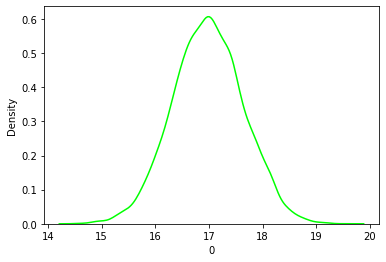

In [45]:
sns.distplot(data_sample_r[0] , color = 'lime' , hist=False)